<h1>2016年登录日志<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#获取数据" data-toc-modified-id="获取数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>获取数据</a></span></li><li><span><a href="#清洗数据" data-toc-modified-id="清洗数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>清洗数据</a></span><ul class="toc-item"><li><span><a href="#修改数据类型" data-toc-modified-id="修改数据类型-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>修改数据类型</a></span></li><li><span><a href="#删除部分数据" data-toc-modified-id="删除部分数据-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>删除部分数据</a></span></li><li><span><a href="#补全数据" data-toc-modified-id="补全数据-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>补全数据</a></span></li></ul></li><li><span><a href="#构建数据模型与数据可视化" data-toc-modified-id="构建数据模型与数据可视化-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>构建数据模型与数据可视化</a></span><ul class="toc-item"><li><span><a href="#用户网络类型" data-toc-modified-id="用户网络类型-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>用户网络类型</a></span></li><li><span><a href="#词云图" data-toc-modified-id="词云图-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>词云图</a></span></li></ul></li></ul></div>

## 获取数据

In [1]:
#引入pandas库
import pandas as pd

In [2]:
#读取数据
data=pd.read_csv(r"data/2016.csv",dtype=object)

In [3]:
#输出数据类型
data.dtypes

Unnamed: 0      object
Unnamed: 0.1    object
id              object
userid          object
loginIp         object
netType         object
Browser         object
operaSys        object
devicemodel     object
IpCountry       object
IpProvince      object
IpCity          object
IpDistrict      object
IpIsp           object
IpType          object
UserAgent       object
LogonDate       object
dtype: object

In [4]:
#查看数据大小
data.shape

(166784, 17)

In [5]:
#查看数据内容
data.head(5)

,Unnamed: 0,Unnamed: 0.1,id,userid,loginIp,netType,Browser,operaSys,devicemodel,IpCountry,IpProvince,IpCity,IpDistrict,IpIsp,IpType,UserAgent,LogonDate
0,368947,368947,399,11285.0,210.42.192.85,WIFI,Safari,IOS,iPhone,中国,湖南省,长沙市,未知,教育网,未知,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...,2016-04-08 16:43:36.273
1,368948,368948,398,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit...,2016-04-08 16:42:59.710
2,368949,368949,397,201465550293.0,42.48.40.9,WIFI,Opera,Android,Linux,中国,湖南省,长沙市,未知,联通,未知,Mozilla/5.0 (Linux; Xhrome 6.0; H60-L03 Build...,2016-04-08 15:30:28.967
3,368950,368950,396,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit...,2016-04-08 15:15:14.127
4,368951,368951,395,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit...,2016-04-08 15:14:43.037


登录日志开始于2016年4月，全年使用不到8个月，共产生16万多条日志。

## 清洗数据

### 修改数据类型

In [6]:
#将登录时间设置为日期型数据
data["LogonDate"]=pd.to_datetime(data["LogonDate"])

In [7]:
#查看修改后后数据类型
data.dtypes

Unnamed: 0              object
Unnamed: 0.1            object
id                      object
userid                  object
loginIp                 object
netType                 object
Browser                 object
operaSys                object
devicemodel             object
IpCountry               object
IpProvince              object
IpCity                  object
IpDistrict              object
IpIsp                   object
IpType                  object
UserAgent               object
LogonDate       datetime64[ns]
dtype: object

In [8]:
#UserAgent列数据显示不完整，可以通过调整列最大宽度查看完整信息
pd.set_option("max_colwidth",300)

In [9]:
data.head(50)

,Unnamed: 0,Unnamed: 0.1,id,userid,loginIp,netType,Browser,operaSys,devicemodel,IpCountry,IpProvince,IpCity,IpDistrict,IpIsp,IpType,UserAgent,LogonDate
0,368947,368947,399,11285.0,210.42.192.85,WIFI,Safari,IOS,iPhone,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Mobile/13E238 MicroMessenger/6.3.15 NetType/WIFI Language/zh_CN",2016-04-08 16:43:36.273
1,368948,368948,398,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 16:42:59.710
2,368949,368949,397,201465550293.0,42.48.40.9,WIFI,Opera,Android,Linux,中国,湖南省,长沙市,未知,联通,未知,"Mozilla/5.0 (Linux; Xhrome 6.0; H60-L03 Build/HDH60-L03; wv) AppleWebKit/537.36 (KHTML, like Cocca) Version/4.0 Chrome/45.0.2454.95 Mobile Safari/537.36 MicroMessenger/6.3.15.49_r8aff805.760 NetType/WIFI Language/zh_CN",2016-04-08 15:30:28.967
3,368950,368950,396,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:15:14.127
4,368951,368951,395,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:14:43.037
5,368952,368952,394,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:14:12.737
6,368953,368953,393,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:13:43.127
7,368954,368954,392,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,中国,湖南省,长沙市,未知,教育网,未知,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:13:12.100
8,368955,368955,383,11285.0,192.168.0.254,WIFI,Safari,IOS,iPhone,未分配或者内网IP,未知,未知,未知,未知,未知,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Mobile/13E238 MicroMessenger/6.3.15 NetType/WIFI Language/zh_CN",2016-04-08 13:18:49.610
9,368956,368956,382,11285.0,192.168.0.254,WIFI,Safari,IOS,iPhone,未分配或者内网IP,未知,未知,未知,未知,未知,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Mobile/13E238 MicroMessenger/6.3.6 NetType/WIFI Language/zh_CN",2016-04-08 13:13:35.770


### 删除部分数据

In [10]:
#去除部分列数据
dataNew=data.drop(columns=["Unnamed: 0","IpCountry","IpProvince","IpCity","IpDistrict","IpIsp","IpType"])

In [11]:
#查看前5行数据
dataNew.head(5)

,Unnamed: 0.1,id,userid,loginIp,netType,Browser,operaSys,devicemodel,UserAgent,LogonDate
0,368947,399,11285.0,210.42.192.85,WIFI,Safari,IOS,iPhone,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Mobile/13E238 MicroMessenger/6.3.15 NetType/WIFI Language/zh_CN",2016-04-08 16:43:36.273
1,368948,398,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 16:42:59.710
2,368949,397,201465550293.0,42.48.40.9,WIFI,Opera,Android,Linux,"Mozilla/5.0 (Linux; Xhrome 6.0; H60-L03 Build/HDH60-L03; wv) AppleWebKit/537.36 (KHTML, like Cocca) Version/4.0 Chrome/45.0.2454.95 Mobile Safari/537.36 MicroMessenger/6.3.15.49_r8aff805.760 NetType/WIFI Language/zh_CN",2016-04-08 15:30:28.967
3,368950,396,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:15:14.127
4,368951,395,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:14:43.037


In [12]:
dataNew[dataNew["netType"]=="Unknown"].head(50)

,Unnamed: 0.1,id,userid,loginIp,netType,Browser,operaSys,devicemodel,UserAgent,LogonDate
1,368948,398,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 16:42:59.710
3,368950,396,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:15:14.127
4,368951,395,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:14:43.037
5,368952,394,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:14:12.737
6,368953,393,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:13:43.127
7,368954,392,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:13:12.100
11,368958,380,11285.0,192.168.0.254,Unknown,Safari,IOS,IPhone,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Version/9.0 Mobile/13B143 Safari/601.1 wechatdevtools/0.4.0 MicroMessenger/6.3.15 Language/zh_CN webview/0",2016-04-08 12:54:40.407
75,369023,2946,201565330283.0,10.0.1.10,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; Che1-CL10 Build/Che1-CL10) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/33.0.0.0 Mobile Safari/537.36 MicroMessenger/6.3.16.49_r03ae324.780 NetType/ctlte Language/zh_CN",2016-07-06 09:54:34.467
77,369025,2944,201565330283.0,10.0.1.10,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; Che1-CL10 Build/Che1-CL10) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/33.0.0.0 Mobile Safari/537.36 MicroMessenger/6.3.16.49_r03ae324.780 NetType/ctlte Language/zh_CN",2016-07-06 09:53:55.140
109,428546,1945,201565550118.0,106.18.232.221,Unknown,QQ,Android,Android Device,"Mozilla/5.0 (Linux; Android 5.1.1; PE-CL00 Build/HuaweiPE-CL00) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/37.0.0.0 Mobile MQQBrowser/6.2 TBS/036523 Safari/537.36 MicroMessenger/6.3.18.800 NetType/ctlte Language/zh_CN",2016-06-19 21:56:22.043


### 补全数据

In [13]:
dataNew[dataNew["netType"]=="Unknown"].index

Int64Index([     1,      3,      4,      5,      6,      7,     11,     75,
                77,    109,
            ...
            166640, 166653, 166714, 166731, 166744, 166747, 166748, 166752,
            166754, 166755],
           dtype='int64', length=22235)

In [14]:
#补全网络类型
for i in dataNew[dataNew["netType"]=="Unknown"].index:
    if "NetType/4G" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"netType"]="4G"
    elif "NetType/ctlte" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"netType"]="ctlte"
    elif "NetType/cmwap" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"netType"]="cmwap"
    elif "NetType/ctwap" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"netType"]="ctwap"
    elif "NetType/uniwap" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"netType"]="uniwap"

for i in dataNew.index:
    if "iPhone OS 9" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 9" 
    elif "iPhone OS 10" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 10" 
    elif "iPhone OS 11" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 11" 
    elif "iPhone OS 12" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 12" 
    elif "iPhone OS 13" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 13" 
    elif "iPhone OS 14" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 14" 
    elif "iPhone OS 15" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 15" 
    elif "iPhone OS 16" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="iPhone OS 16" 
    elif "Android 4" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 4" 
    elif "Android 5" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 5" 
    elif "Android 6" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 6" 
    elif "Android 7" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 7" 
    elif "Android 8" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 8" 
    elif "Android 9" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 9" 
    elif "Android 10" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 10" 
    elif "Android 11" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 11" 
    elif "Android 12" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 12" 
    elif "Android 13" in dataNew.loc[i,"UserAgent"]:
        dataNew.loc[i,"operaSys"]="Android 13" 

## 构建数据模型与数据可视化
### 用户网络类型

In [15]:
#按netType对数据进行分组
group=dataNew.groupby(by="netType")

In [16]:
#计数
group.count().sort_values(by="userid")

,Unnamed: 0.1,id,userid,loginIp,Browser,operaSys,devicemodel,UserAgent,LogonDate
netType,,,,,,,,,
uniwap,18,18,18,18,18,18,18,18,18
ctwap,181,181,181,181,181,181,181,181,181
Unknown,662,662,662,662,662,662,662,662,662
cmwap,690,690,690,690,690,690,690,690,690
2G,972,972,972,972,972,972,972,972,972
3G+,1166,1166,1166,1166,1166,1166,1166,1166,1166
ctlte,1649,1649,1649,1649,1649,1649,1649,1649,1649
3G,2838,2838,2838,2838,2838,2838,2838,2838,2838
CTNET,2967,2967,2967,2967,2967,2967,2967,2967,2967


In [17]:
#取userid列数据，用于绘图
netType=group.count().sort_values(by="userid")["userid"]

In [18]:
netType.to_csv("2016netType.csv")

In [19]:
osgroup=dataNew.groupby(by="operaSys")
osgroup.count().sort_values(by="userid")
operaSys=osgroup.count().sort_values(by="userid")["userid"]
operaSys.to_csv("2016operaSys.csv")

将网络类型用饼图呈现

**plt.pie(x,explode,labels,autopct,pctdistance,shadow,labeldistance,startangle)**

*x：数据，可以一个序列，也可以是一个数组*

*explode：每一块的突出程度，len(x)*

*lables：标签*

*autopct：设置圆内的文本*

*pctdistance：设置圆内文本距圆心距离，默认为0.6，大于1，文本在圆外。*

*labeldistance：设置标签文本距圆心距离，默认1.1，小于1，文本在圆内。*

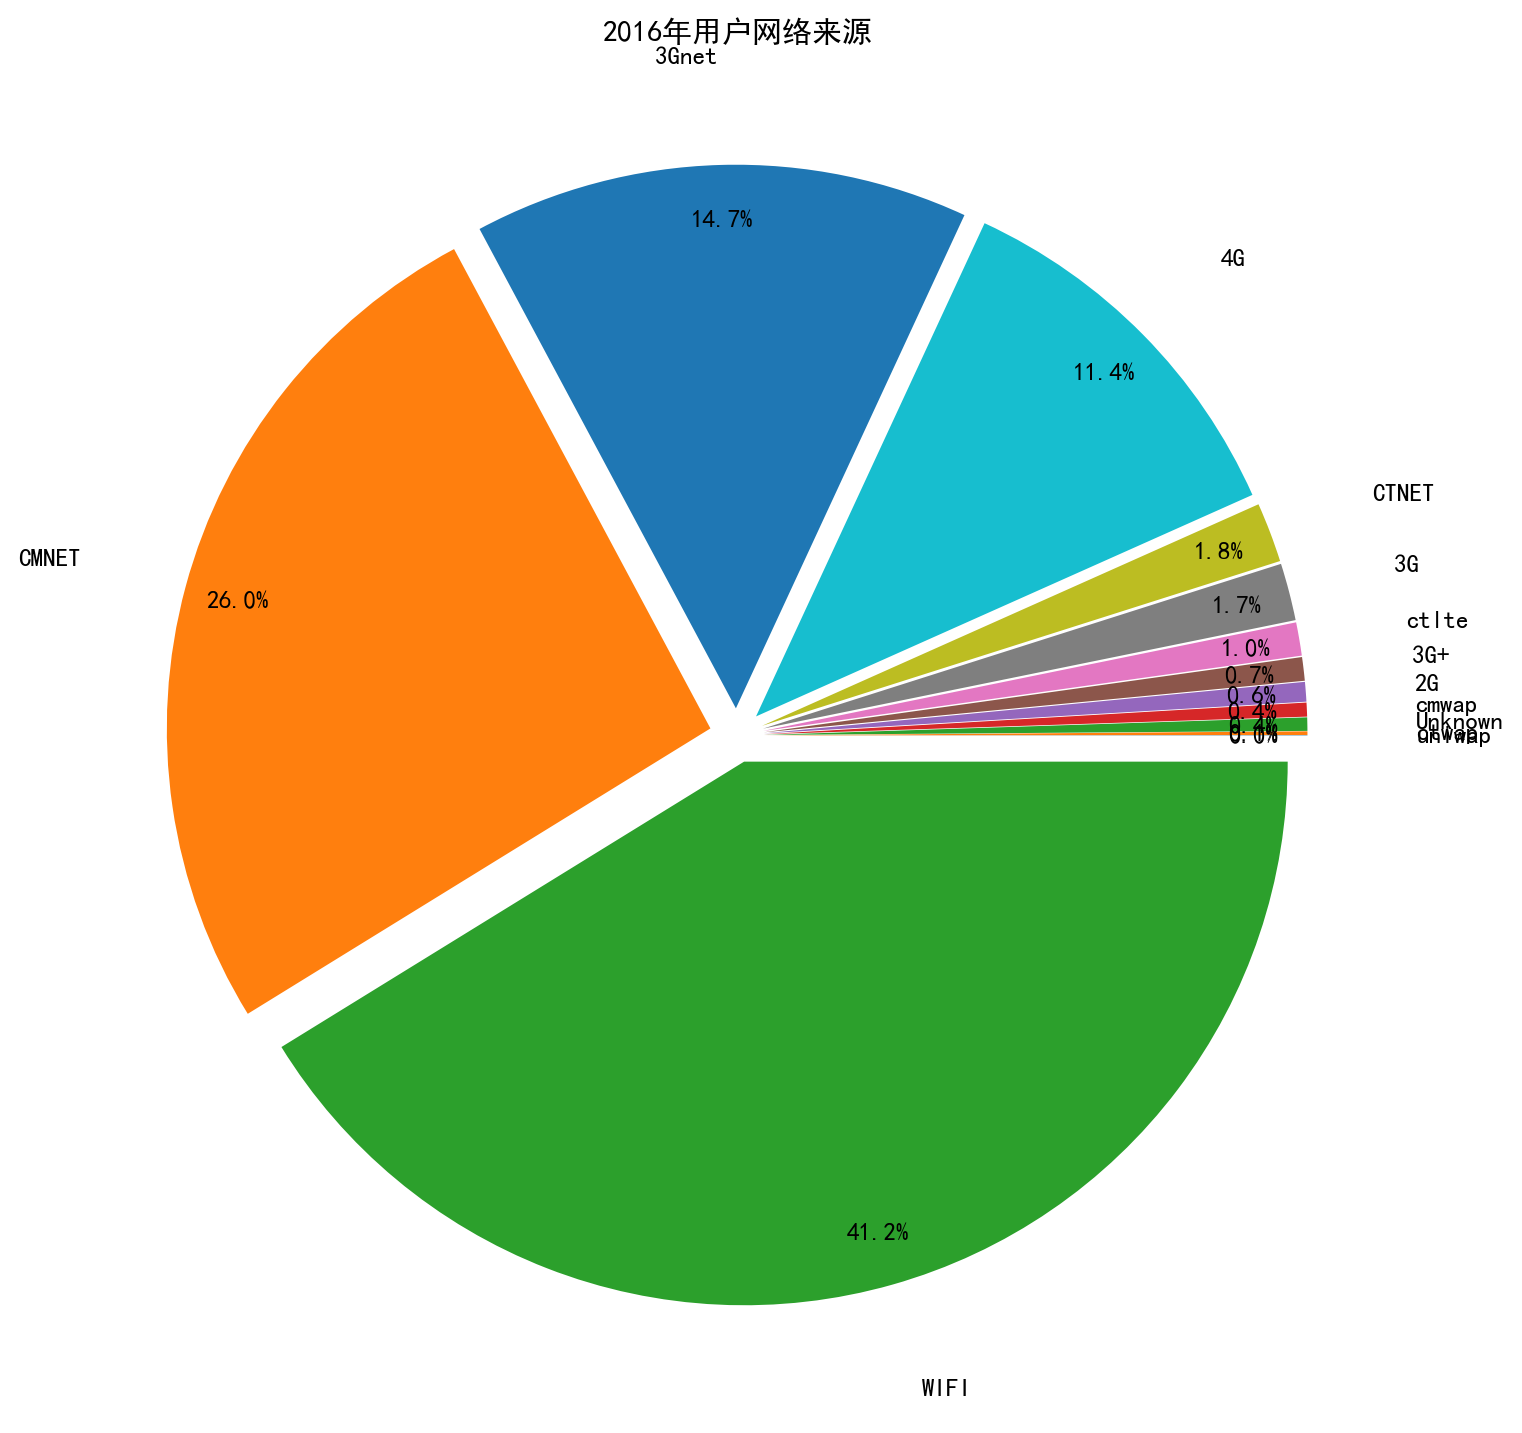

In [20]:
#画饼图
#引入matplotlib.pyplot库
import matplotlib.pyplot as plt
#设置画布大小
plt.figure(figsize=(10,10),dpi=180)
#修改字体
plt.rcParams["font.sans-serif"]="SimHei"
#设置标题
plt.title("2016年用户网络来源")
#画图
plt.pie(netType,explode=[0.05]*len(netType),labels=netType.index,labeldistance=1.2,autopct="%1.1f%%",pctdistance=0.9)
#呈现
plt.show()

In [21]:
#查看dataNew数据
dataNew.head()

,Unnamed: 0.1,id,userid,loginIp,netType,Browser,operaSys,devicemodel,UserAgent,LogonDate
0,368947,399,11285.0,210.42.192.85,WIFI,Safari,IOS,iPhone,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Mobile/13E238 MicroMessenger/6.3.15 NetType/WIFI Language/zh_CN",2016-04-08 16:43:36.273
1,368948,398,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 16:42:59.710
2,368949,397,201465550293.0,42.48.40.9,WIFI,Opera,Android,Linux,"Mozilla/5.0 (Linux; Xhrome 6.0; H60-L03 Build/HDH60-L03; wv) AppleWebKit/537.36 (KHTML, like Cocca) Version/4.0 Chrome/45.0.2454.95 Mobile Safari/537.36 MicroMessenger/6.3.15.49_r8aff805.760 NetType/WIFI Language/zh_CN",2016-04-08 15:30:28.967
3,368950,396,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:15:14.127
4,368951,395,11285.0,210.42.192.85,Unknown,Opera,Android,Linux,"Mozilla/5.0 (Linux; Android 4.4.4; AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38 Mobile Safari/537.36 wechatdevtools/0.4.0 MicroMessenger/6.3.15 webview/0",2016-04-08 15:14:43.037


### 词云图

In [22]:
#引入词云库
from wordcloud import WordCloud

In [23]:
#引入Image库
from PIL import Image

In [31]:
import numpy as np
#定义mask
# t_mask=np.array(Image.open('a.png'))

In [27]:
#生成词云文本
txt=" ".join(dataNew["netType"])

In [28]:
txt

'WIFI Unknown WIFI Unknown Unknown Unknown Unknown Unknown WIFI WIFI WIFI Unknown WIFI WIFI WIFI 3G+ 3G 3G WIFI WIFI 3G 3G WIFI 3G 3G 3G CMNET 3G CTNET CMNET 3G WIFI WIFI WIFI CTNET CTNET CTNET CTNET WIFI CTNET CTNET CTNET 3G CMNET CMNET CMNET CMNET CMNET CMNET CMNET CMNET CMNET 3G CMNET 3G CMNET CMNET CMNET 3G 3G 3G 3G 3G 3G 3G 3G 3G WIFI WIFI WIFI WIFI WIFI WIFI WIFI 3G ctlte 3Gnet ctlte 3Gnet WIFI WIFI WIFI WIFI WIFI WIFI 3Gnet WIFI 3Gnet 3Gnet 3Gnet CMNET CMNET CMNET WIFI 3Gnet 3Gnet WIFI WIFI WIFI 3G WIFI 3Gnet 3Gnet WIFI 3Gnet WIFI WIFI 3Gnet WIFI ctlte WIFI ctlte CMNET 4G CMNET CMNET CMNET WIFI WIFI 2G WIFI WIFI WIFI WIFI CMNET WIFI WIFI WIFI WIFI WIFI WIFI WIFI WIFI WIFI 3G+ WIFI WIFI WIFI 3Gnet 3Gnet WIFI WIFI WIFI WIFI WIFI WIFI 4G WIFI WIFI WIFI 3Gnet WIFI WIFI WIFI CMNET CMNET CMNET CMNET WIFI CMNET 3Gnet WIFI WIFI 3Gnet 3Gnet 3Gnet WIFI WIFI WIFI WIFI 3Gnet 4G WIFI WIFI CMNET CMNET CMNET WIFI WIFI 3Gnet WIFI CMNET CMNET CMNET WIFI 3Gnet 4G WIFI CMNET 3G+ WIFI WIFI WIFI WIF

In [29]:
wc=WordCloud(
    background_color='white',#设置背景色
    width=800,#设置背景宽
    height=500,#设置背景高
    max_font_size=100,#设置最大字体
            )

In [30]:
wc.generate(txt) #根据文本产生词云
wc.to_file("wc.png")